In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from darwin.config import (
    MODELS_DIR,
    PROCESSED_DATA_DIR,
    SCORES_DIR,
    RANDOM_STATE,
    METRICS,
    RANDOM_SEEDS,
    FEATURE_NUM,
    RAW_DATA_DIR
)

In [76]:
raw_scores = pd.read_csv(f"{SCORES_DIR}/raw_score.csv")
feature_imp_scores = pd.read_csv(f"{SCORES_DIR}/feature_imp_score.csv")
anvoa_scores = pd.read_csv(f"{SCORES_DIR}/anova_score.csv")
rfe_scores = pd.read_csv(f"{SCORES_DIR}/rfe_score.csv")

In [77]:
raw_scores.head()

,Unnamed: 0,Unnamed: 1,accuracy,precision,recall,f1
0,tree,454,0.804538,0.828937,0.809804,0.809899
1,tree,167,0.799328,0.857995,0.730719,0.786284
2,tree,332,0.798992,0.799570,0.830719,0.810623
3,tree,322,0.833445,0.821992,0.865359,0.841361
4,tree,222,0.770420,0.789951,0.753595,0.770980


### Changing the Unnamed column names

In [78]:
for df in [
    raw_scores,
    feature_imp_scores,
    anvoa_scores,
    rfe_scores
]:
    df.rename(columns={"Unnamed: 0": "model", "Unnamed: 1": "seed"}, inplace=True)
    df.drop(columns=["seed"], inplace=True)

In [79]:
rfe_scores.head()

,model,accuracy,precision,recall,f1
0,tree,0.747731,0.767159,0.733333,0.742849
1,tree,0.764706,0.752601,0.809150,0.779500
2,tree,0.775966,0.811111,0.742484,0.772908
3,tree,0.798487,0.805742,0.820261,0.806130
4,tree,0.799328,0.834920,0.764706,0.796187


## Comparing feature selection strategies from model score

/Users/eduardoduarte/miniconda3/envs/refactor-darwin/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


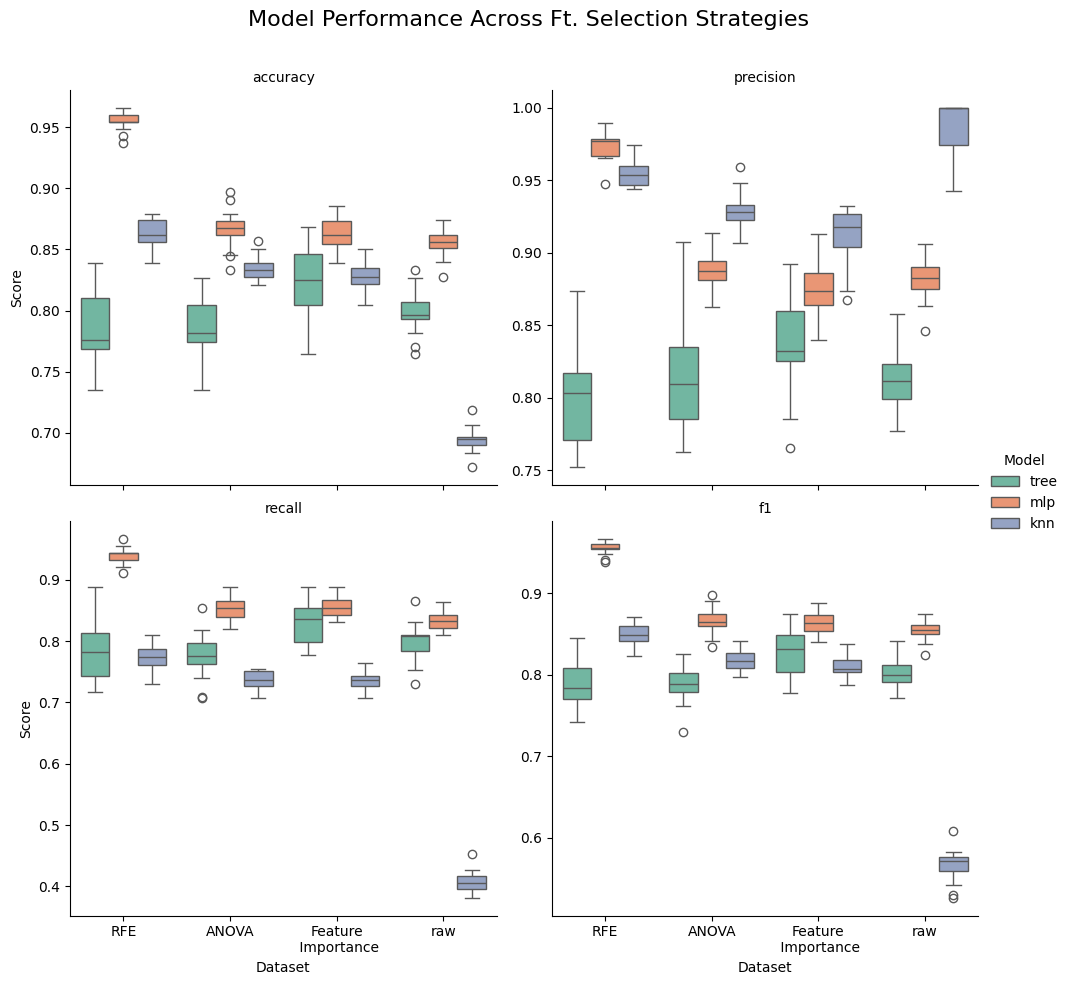

In [80]:
def plot_facet_grid(all_scores):
    # Ensure the DataFrame is in long format
    # Assuming columns: 'model', 'metric', 'value', and 'dataset'
    all_scores = all_scores.melt(id_vars=['model', 'dataset'], 
                                 value_vars=['accuracy', 'precision', 'recall', 'f1'], 
                                 var_name='metric', 
                                 value_name='value')

    # Create a FacetGrid for the metrics
    g = sns.FacetGrid(all_scores, col="metric", col_wrap=2, height=5, sharey=False)
    g.map(sns.boxplot, "dataset", "value", "model", order=None, palette="Set2")
    g.add_legend(title="Model")

    # Customize the plot
    g.set_titles("{col_name}")
    g.set_axis_labels("Dataset", "Score")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle("Model Performance Across Ft. Selection Strategies", fontsize=16)

    plt.show()

# Combine all datasets into a single DataFrame
rfe_scores['dataset'] = 'RFE'
anvoa_scores['dataset'] = 'ANOVA'
feature_imp_scores['dataset'] = 'Feature\n Importance'
raw_scores['dataset'] = 'raw'

all_scores = pd.concat([rfe_scores, anvoa_scores, feature_imp_scores, raw_scores])

# Call the function to plot Facet Grids
plot_facet_grid(all_scores)

## Comparing models based on feature selection strategy

/Users/eduardoduarte/miniconda3/envs/refactor-darwin/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


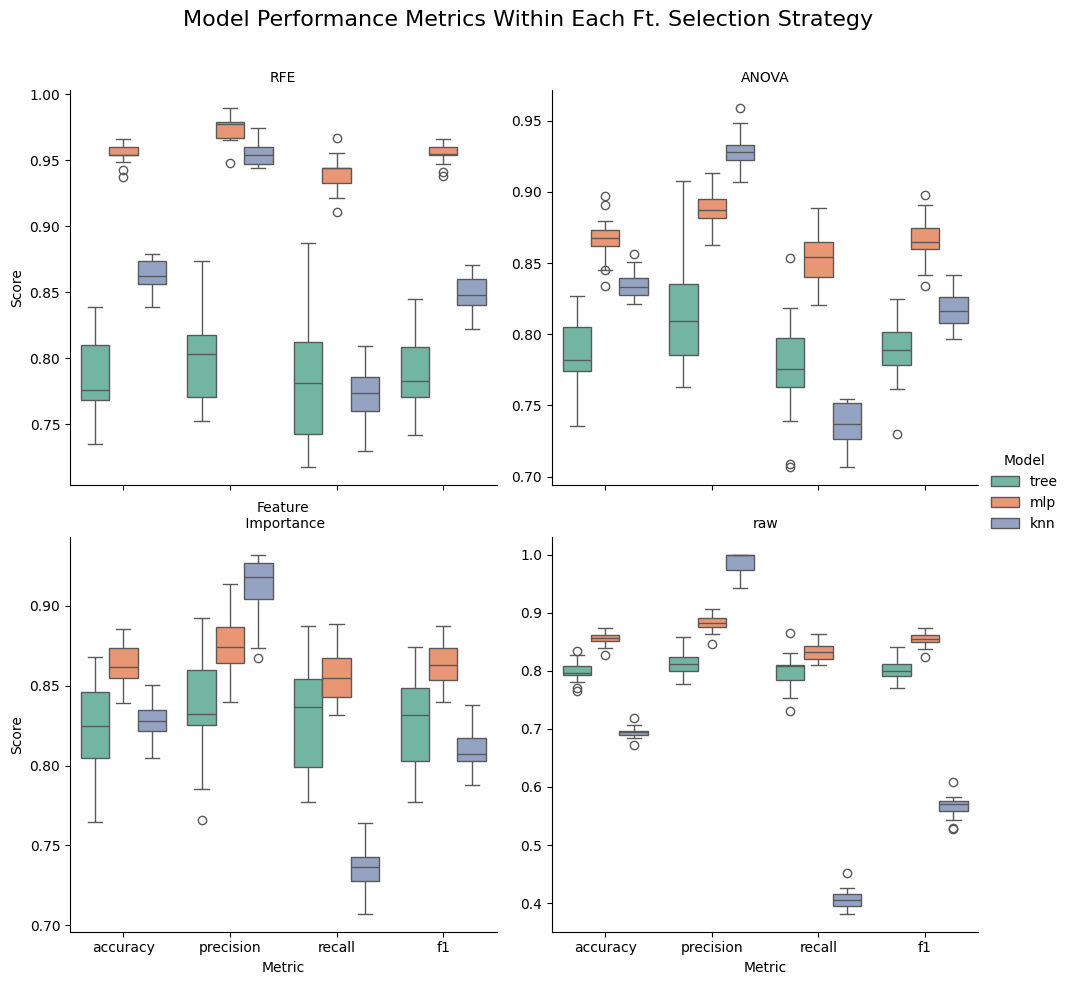

In [81]:
def plot_facet_grid_by_dataset(all_scores):
    # Ensure the DataFrame is in long format
    # Assuming columns: 'model', 'metric', 'value', and 'dataset'
    all_scores = all_scores.melt(id_vars=['model', 'dataset'], 
                                 value_vars=['accuracy', 'precision', 'recall', 'f1'], 
                                 var_name='metric', 
                                 value_name='value')

    # Create a FacetGrid for the datasets
    g = sns.FacetGrid(all_scores, col="dataset", col_wrap=2, height=5, sharey=False)
    g.map(sns.boxplot, "metric", "value", "model", order=None, palette="Set2")
    g.add_legend(title="Model")

    # Customize the plot
    g.set_titles("{col_name}")
    g.set_axis_labels("Metric", "Score")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle("Model Performance Metrics Within Each Ft. Selection Strategy", fontsize=16)

    plt.show()

# Combine all datasets into a single DataFrame
rfe_scores['dataset'] = 'RFE'
anvoa_scores['dataset'] = 'ANOVA'
feature_imp_scores['dataset'] = 'Feature\n Importance'
raw_scores['dataset'] = 'raw'

all_scores = pd.concat([rfe_scores, anvoa_scores, feature_imp_scores, raw_scores])

# Call the function to plot Facet Grids by dataset
plot_facet_grid_by_dataset(all_scores)

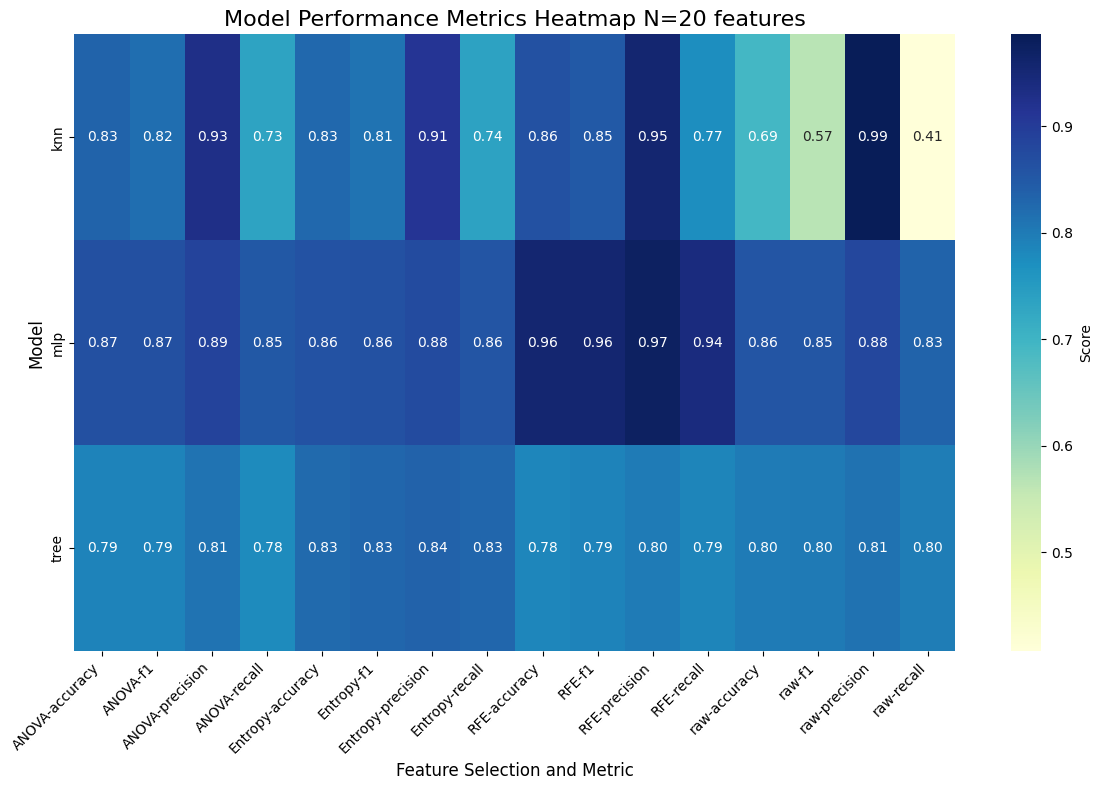

In [82]:
def plot_heatmap(all_scores):
    # Ensure the DataFrame is in long format
    all_scores = all_scores.melt(id_vars=['model', 'dataset'], 
                                 value_vars=['accuracy', 'precision', 'recall', 'f1'], 
                                 var_name='metric', 
                                 value_name='value')

    # Pivot the data to create a heatmap-friendly format
    heatmap_data = all_scores.pivot_table(index='model', columns=['dataset', 'metric'], values='value', aggfunc='mean')

    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Score'})

    # Customize the plot
    plt.title(f"Model Performance Metrics Heatmap N={FEATURE_NUM} features", fontsize=16)
    plt.xlabel("Feature Selection and Metric", fontsize=12)
    plt.ylabel("Model", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()

# Combine all datasets into a single DataFrame
rfe_scores['dataset'] = 'RFE'
anvoa_scores['dataset'] = 'ANOVA'
feature_imp_scores['dataset'] = 'Entropy'
raw_scores['dataset'] = 'raw'

all_scores = pd.concat([rfe_scores, anvoa_scores, feature_imp_scores, raw_scores])

# Call the function to plot the heatmap
plot_heatmap(all_scores)

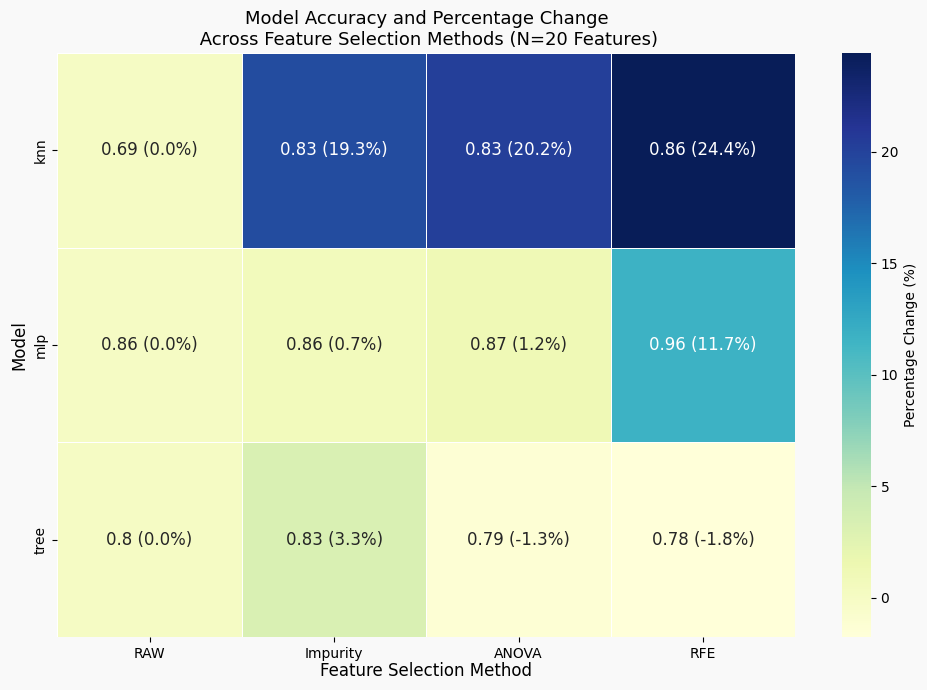

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap_with_percentage_change(all_scores):
    """
    Plots a heatmap showing accuracy scores and percentage change relative to the RAW dataset.

    Parameters:
        all_scores (pd.DataFrame): A DataFrame containing accuracy scores for models across datasets.
    """
    # Ensure the DataFrame is in long format
    all_scores = all_scores.melt(id_vars=['model', 'dataset'], 
                                 value_vars=['accuracy'], 
                                 var_name='metric', 
                                 value_name='value')

    # Pivot the data to create a heatmap-friendly format
    heatmap_data = all_scores.pivot_table(index='model', columns=['dataset'], values='value', aggfunc='mean')

    # Calculate percentage change relative to the RAW dataset
    raw_values = heatmap_data['RAW']
    percentage_change = heatmap_data.subtract(raw_values, axis=0).divide(raw_values, axis=0) * 100

    # Combine accuracy scores with percentage change
    combined_data = heatmap_data.copy()
    for col in heatmap_data.columns:
        combined_data[col] = heatmap_data[col].round(2).astype(str) + " (" + percentage_change[col].round(1).astype(str) + "%)"

    # Reorder the columns to make 'RAW' the first dataset
    column_order = ['RAW', 'Impurity', 'ANOVA', 'RFE']
    percentage_change = percentage_change[column_order]
    combined_data = combined_data[column_order]

    # Plot the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(
        percentage_change,  # Use percentage_change for coloring
        annot=combined_data.values,  # Display combined accuracy and percentage change
        fmt="",  # No formatting needed since values are strings
        cmap="YlGnBu",  # Diverging color palette for percentage changes
        cbar_kws={'label': 'Percentage Change (%)'},
        linewidths=0.5,  # Add spacing between the squares
        linecolor="white",
        annot_kws={"size": 12}
    )

    # Set the background color
    plt.gca().set_facecolor("#f9f9f9")  # Set the axes background color
    plt.gcf().set_facecolor("#f9f9f9")  # Set the figure background color


    # Customize the plot
    plt.title(f"Model Accuracy and Percentage Change\n Across Feature Selection Methods (N=20 Features)", fontsize=13)
    plt.xlabel("Feature Selection Method", fontsize=12, labelpad=1, ha='center')  # Center the x-axis label
    plt.ylabel("Model", fontsize=12)
    plt.xticks(rotation=0, ha='center')  # Ensure x-axis labels are centered
    plt.tight_layout()

    plt.show()

# Combine all datasets into a single DataFrame
rfe_scores['dataset'] = 'RFE'
anvoa_scores['dataset'] = 'ANOVA'
feature_imp_scores['dataset'] = 'Impurity'
raw_scores['dataset'] = 'RAW'

all_scores = pd.concat([raw_scores, anvoa_scores, feature_imp_scores, rfe_scores])

# Call the function to plot the heatmap
plot_heatmap_with_percentage_change(all_scores)

In [84]:
base_accuracy = raw_scores.drop(['dataset'], axis=1).groupby("model").mean()[["accuracy"]]
base_accuracy

,accuracy
model,
knn,0.693975
mlp,0.856034
tree,0.798866


In [85]:
def metric_mean(raw, imp, rfe, anova, metric):
    base_accuracy = raw.drop(['dataset'], axis=1).groupby("model").mean()[[metric]]
    imp_accuracy = imp.drop(['dataset'], axis=1).groupby("model").mean()[[metric]]
    rfe_accuracy = rfe.drop(['dataset'], axis=1).groupby("model").mean()[[metric]]
    anova_accuracy = anova.drop(['dataset'], axis=1).groupby("model").mean()[[metric]]

    result = pd.DataFrame({
        "raw": base_accuracy[metric],
        "impurity": imp_accuracy[metric],
        "rfe": rfe_accuracy[metric],
        "anova": anova_accuracy[metric]
    })

    return result

all_acc_scores = metric_mean(raw_scores, feature_imp_scores, rfe_scores, anvoa_scores, "accuracy")
all_rec_scores = metric_mean(raw_scores, feature_imp_scores, rfe_scores, anvoa_scores, "recall")
all_pre_scores = metric_mean(raw_scores, feature_imp_scores, rfe_scores, anvoa_scores, "precision")
all_f1_scores = metric_mean(raw_scores, feature_imp_scores, rfe_scores, anvoa_scores, "f1")



In [86]:
all_acc_scores

,raw,impurity,rfe,anova
model,,,,
knn,0.693975,0.827630,0.863529,0.834487
mlp,0.856034,0.861756,0.955790,0.866076
tree,0.798866,0.825101,0.784824,0.788496


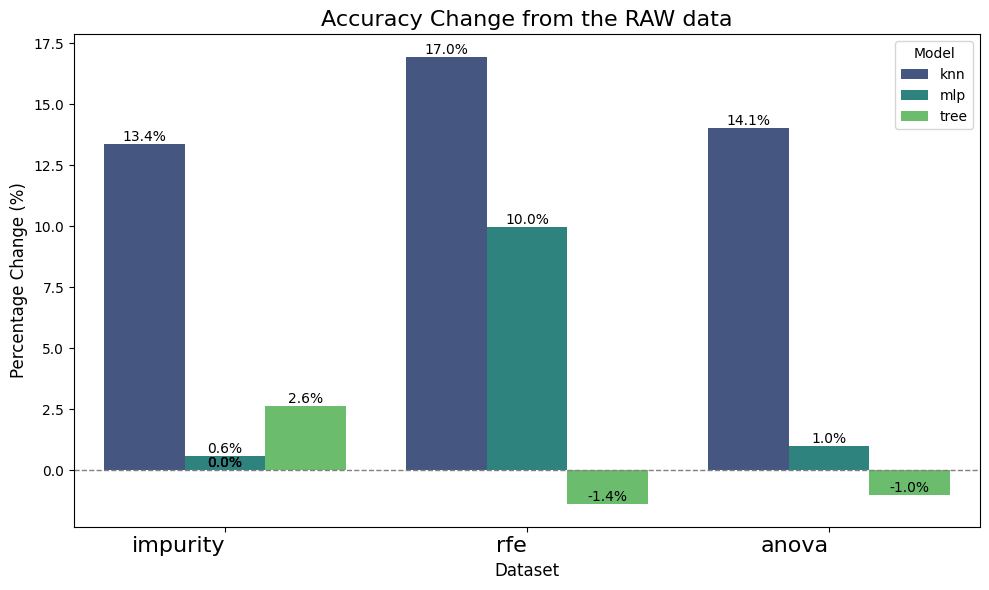

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_accuracy_change(all_acc_scores):
    """
    Plots the percentage change in accuracy for each model based on the raw data.

    Parameters:
        all_acc_scores (pd.DataFrame): A DataFrame containing accuracy scores for models across datasets.
                                       Columns should include 'raw', 'impurity', 'rfe', and 'anova'.
    """
    # Calculate the percentage change relative to the raw data
    percentage_change = (all_acc_scores.drop(columns=["raw"]).subtract(all_acc_scores["raw"], axis=0)) * 100

    # Reshape the DataFrame for plotting
    percentage_change = percentage_change.reset_index().melt(id_vars="model", var_name="dataset", value_name="percentage_change")

    # Plot the data
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=percentage_change, x="dataset", y="percentage_change", hue="model", palette="viridis")

    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):  # Avoid annotating NaN values
            ax.text(
                p.get_x() + p.get_width() / 2,  # X-coordinate (center of the bar)
                height,  # Y-coordinate (slightly above the bar)
                f"{height:.1f}%",  # Format the value as a percentage
                ha="center",  # Horizontal alignment
                va="bottom",  # Vertical alignment
                fontsize=10,  # Font size
                color="black"  # Text color
            )

    # Customize the plot
    plt.axhline(0, color="gray", linestyle="--", linewidth=1)  # Add a horizontal line at 0
    plt.title("Accuracy Change from the RAW data", fontsize=16)
    plt.xlabel("Dataset", fontsize=12)
    plt.ylabel("Percentage Change (%)", fontsize=12)
    plt.xticks(rotation=0, ha="right", fontsize=16)
    plt.legend(title="Model", fontsize=10)
    plt.tight_layout()

    plt.show()

# Example usage
# Assuming `all_acc_scores` is a DataFrame with accuracy scores for models across datasets
# Columns: ['model', 'raw', 'impurity', 'rfe', 'anova']
plot_accuracy_change(all_acc_scores)

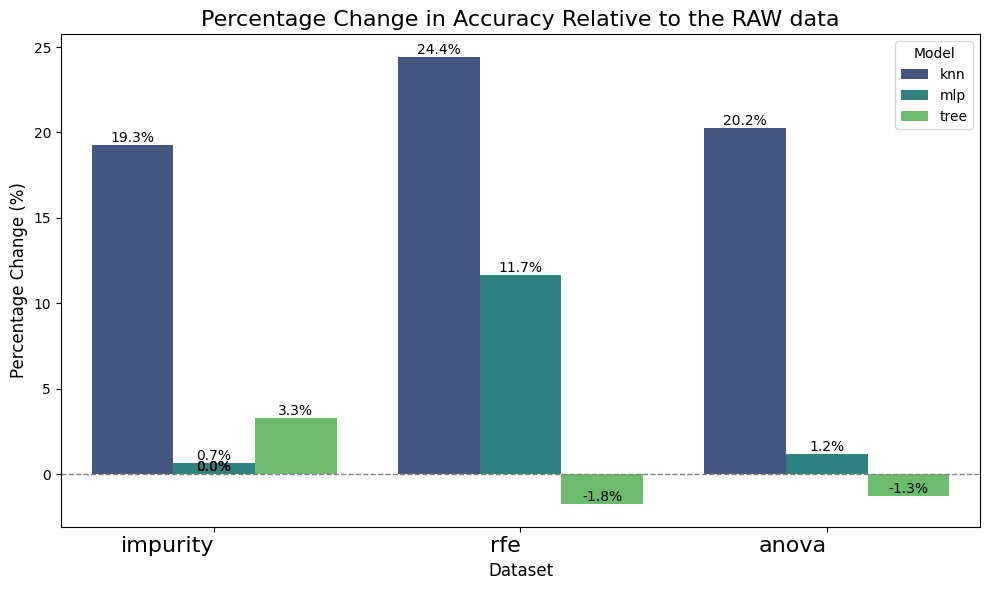

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_accuracy_change(all_acc_scores):
    """
    Plots the percentage change in accuracy for each model based on the raw data.

    Parameters:
        all_acc_scores (pd.DataFrame): A DataFrame containing accuracy scores for models across datasets.
                                       Columns should include 'raw', 'impurity', 'rfe', and 'anova'.
    """
    # Calculate the percentage change relative to the raw data
    percentage_change = (all_acc_scores.drop(columns=["raw"]).divide(all_acc_scores["raw"], axis=0) * 100) -100

    # Reshape the DataFrame for plotting
    percentage_change = percentage_change.reset_index().melt(id_vars="model", var_name="dataset", value_name="percentage_change")

    # Plot the data
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=percentage_change, x="dataset", y="percentage_change", hue="model", palette="viridis")

    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):  # Avoid annotating NaN values
            ax.text(
                p.get_x() + p.get_width() / 2,  # X-coordinate (center of the bar)
                height,  # Y-coordinate (slightly above the bar)
                f"{height:.1f}%",  # Format the value as a percentage
                ha="center",  # Horizontal alignment
                va="bottom",  # Vertical alignment
                fontsize=10,  # Font size
                color="black"  # Text color
            )

    # Customize the plot
    plt.axhline(0, color="gray", linestyle="--", linewidth=1)  # Add a horizontal line at 0
    plt.title("Percentage Change in Accuracy Relative to the RAW data", fontsize=16)
    plt.xlabel("Dataset", fontsize=12)
    plt.ylabel("Percentage Change (%)", fontsize=12)
    plt.xticks(rotation=0, ha="right", fontsize=16)
    plt.legend(title="Model", fontsize=10)
    plt.tight_layout()

    plt.show()

# Example usage
# Assuming `all_acc_scores` is a DataFrame with accuracy scores for models across datasets
# Columns: ['model', 'raw', 'impurity', 'rfe', 'anova']
plot_accuracy_change(all_acc_scores)

In [89]:
(all_acc_scores.drop(columns=["raw"]).divide(all_acc_scores["raw"], axis=0) * 100) -100

,impurity,rfe,anova
model,,,
knn,19.259412,24.432389,20.247509
mlp,0.668512,11.653316,1.173087
tree,3.284069,-1.757745,-1.298059


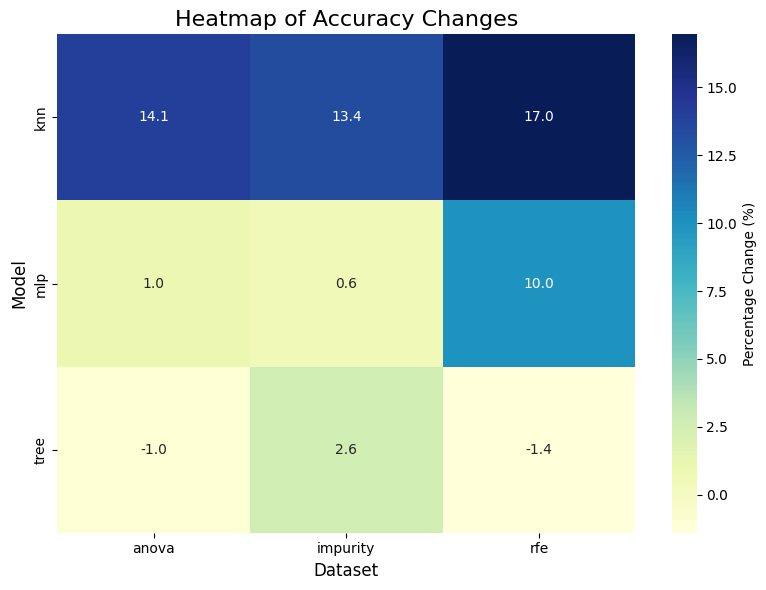

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_accuracy_change(all_acc_scores):
    """
    Plots the percentage change in accuracy for each model based on the raw data.

    Parameters:
        all_acc_scores (pd.DataFrame): A DataFrame containing accuracy scores for models across datasets.
                                       Columns should include 'raw', 'impurity', 'rfe', and 'anova'.
    """
    # Calculate the percentage change relative to the raw data
    percentage_change = (all_acc_scores.drop(columns=["raw"]).subtract(all_acc_scores["raw"], axis=0)) * 100

    # Reshape the DataFrame for plotting
    percentage_change = percentage_change.reset_index().melt(id_vars="model", var_name="dataset", value_name="percentage_change")
    # Plot the data
    # Customize the plot
    heatmap_data = percentage_change.pivot(index="model", columns="dataset", values="percentage_change")
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage Change (%)'})
    plt.title("Heatmap of Accuracy Changes", fontsize=16)
    plt.xlabel("Dataset", fontsize=12)
    plt.ylabel("Model", fontsize=12)
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming `all_acc_scores` is a DataFrame with accuracy scores for models across datasets
# Columns: ['model', 'raw', 'impurity', 'rfe', 'anova']
plot_accuracy_change(all_acc_scores)

/Users/eduardoduarte/miniconda3/envs/refactor-darwin/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/eduardoduarte/miniconda3/envs/refactor-darwin/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/eduardoduarte/miniconda3/envs/refactor-darwin/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


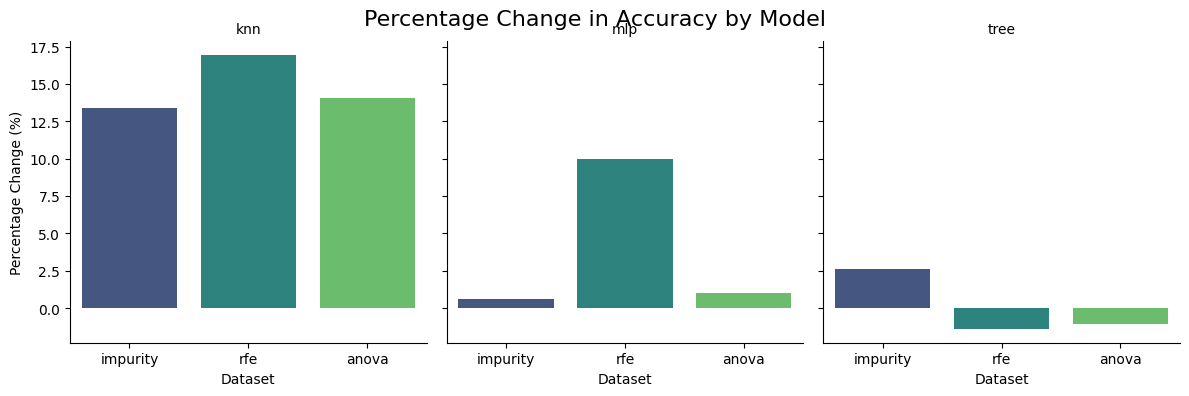

,raw,impurity,rfe,anova
model,,,,
knn,0.693975,0.827630,0.863529,0.834487
mlp,0.856034,0.861756,0.955790,0.866076
tree,0.798866,0.825101,0.784824,0.788496


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_accuracy_change(all_acc_scores):
    """
    Plots the percentage change in accuracy for each model based on the raw data.

    Parameters:
        all_acc_scores (pd.DataFrame): A DataFrame containing accuracy scores for models across datasets.
                                       Columns should include 'raw', 'impurity', 'rfe', and 'anova'.
    """
    # Calculate the percentage change relative to the raw data
    percentage_change = (all_acc_scores.drop(columns=["raw"]).subtract(all_acc_scores["raw"], axis=0)) * 100

    # Reshape the DataFrame for plotting
    percentage_change = percentage_change.reset_index().melt(id_vars="model", var_name="dataset", value_name="percentage_change")
    # Plot the data
    # Customize the plot
    g = sns.FacetGrid(percentage_change, col="model", col_wrap=3, height=4, sharey=True)
    g.map(sns.barplot, "dataset", "percentage_change", order=percentage_change["dataset"].unique(), palette="viridis")
    g.set_titles("{col_name}")
    g.set_axis_labels("Dataset", "Percentage Change (%)")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle("Percentage Change in Accuracy by Model", fontsize=16)
    plt.show()

# Example usage
# Assuming `all_acc_scores` is a DataFrame with accuracy scores for models across datasets
# Columns: ['model', 'raw', 'impurity', 'rfe', 'anova']
plot_accuracy_change(all_acc_scores)

In [111]:
aaaa_scores = all_acc_scores.copy()
aaaa_scores.reset_index(drop=True, inplace=True)
aaaa_scores["model"] = ["knn", "mlp", "tree"]
aaaa_scores

,raw,impurity,rfe,anova,model
0,0.693975,0.827630,0.863529,0.834487,knn
1,0.856034,0.861756,0.955790,0.866076,mlp
2,0.798866,0.825101,0.784824,0.788496,tree


In [ ]:
rfe_log_score = pd.read_csv(f"{SCORES_DIR}/rfe_score.csv")
rfe_tree_scores = pd.read_csv(f"{SCORES_DIR}/rfe_tree_score.csv")
rfe_gdb_scores = pd.read_csv(f"{SCORES_DIR}/rfe_gdb_score.csv")

In [ ]:
for df in [
    rfe_log_score,
    rfe_tree_scores,
    rfe_gdb_scores,
]:
    df.rename(columns={"Unnamed: 0": "model", "Unnamed: 1": "seed"}, inplace=True)
    df.drop(columns=["seed"], inplace=True)

In [ ]:
feature_imp_scores.head()

,model,accuracy,precision,recall,f1,dataset
0,tree,0.781681,0.785607,0.798039,0.787466,Impurity
1,tree,0.822353,0.834507,0.832026,0.830044,Impurity
2,tree,0.868067,0.888889,0.866013,0.874278,Impurity
3,tree,0.804538,0.830025,0.785621,0.804716,Impurity
4,tree,0.804370,0.829713,0.785621,0.797462,Impurity


In [ ]:
def metric_mean(raw, imp, rfe, metric):
    base_accuracy = raw.groupby("model").mean()[[metric]]
    imp_accuracy = imp.groupby("model").mean()[[metric]]
    rfe_accuracy = rfe.groupby("model").mean()[[metric]]

    result = pd.DataFrame({
        "log": base_accuracy[metric],
        "tree": imp_accuracy[metric],
        "gdb": rfe_accuracy[metric],
    })

    return result

rfe_acc_all_scores =  metric_mean(rfe_log_score, rfe_tree_scores, rfe_gdb_scores, "accuracy")

In [ ]:
rfe_acc_all_scores

,log,tree,gdb
model,,,
knn,0.863529,0.766731,0.829613
mlp,0.955790,0.845958,0.854109
tree,0.784824,0.869294,0.837714


In [ ]:
all_scores

,model,accuracy,precision,recall,f1,dataset
0,tree,0.804538,0.828937,0.809804,0.809899,RAW
1,tree,0.799328,0.857995,0.730719,0.786284,RAW
2,tree,0.798992,0.799570,0.830719,0.810623,RAW
3,tree,0.833445,0.821992,0.865359,0.841361,RAW
4,tree,0.770420,0.789951,0.753595,0.770980,RAW
...,...,...,...,...,...,...
55,knn,0.873613,0.951074,0.797386,0.863893,RFE
56,knn,0.861849,0.956731,0.763399,0.847287,RFE
57,knn,0.862353,0.944048,0.776471,0.849274,RFE
58,knn,0.879160,0.974603,0.786275,0.866631,RFE


In [ ]:
rfe_tree_scores['dataset'] = 'tree'
rfe_gdb_scores['dataset'] = 'gdb'
rfe_log_score['dataset'] = 'log'

all_rfe_scores = pd.concat([rfe_tree_scores, rfe_gdb_scores, rfe_log_score])

In [ ]:
all_rfe_scores[(all_rfe_scores['model'] == 'tree')].drop(columns=['model']).groupby("dataset").mean()

,accuracy,precision,recall,f1
dataset,,,,
gdb,0.837714,0.854570,0.830490,0.839047
log,0.784824,0.798842,0.786863,0.787913
tree,0.869294,0.879345,0.870588,0.871218


In [ ]:
all_rfe_scores = pd.concat([raw_scores, rfe_tree_scores, rfe_gdb_scores, rfe_log_score])
scores = all_rfe_scores[(all_rfe_scores['model'] == 'tree')].drop(columns=['model']).groupby("dataset").mean().reset_index()
baseline = scores[scores['dataset'] == 'RAW']
baseline

,dataset,accuracy,precision,recall,f1
0,RAW,0.798866,0.813034,0.79817,0.80134


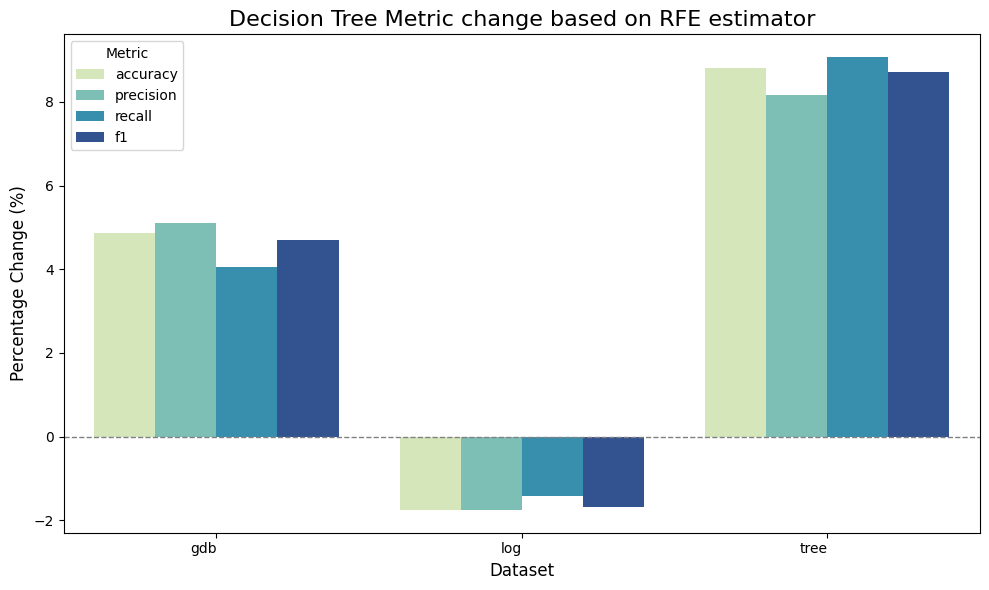

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_percentage_change(scores, baseline_dataset="RAW"):
    """
    Plots the percentage change in metrics for datasets compared to a baseline dataset.

    Parameters:
        scores (pd.DataFrame): A DataFrame containing metrics for different datasets.
        baseline_dataset (str): The name of the baseline dataset (default is "RAW").
    """
    # Extract the baseline metrics
    baseline = scores[scores['dataset'] == baseline_dataset].iloc[0, 1:]  # Exclude the 'dataset' column

    # Calculate the percentage change relative to the baseline
    percentage_change = scores.copy()
    for col in baseline.index:
        percentage_change[col] = ((scores[col] - baseline[col]) / baseline[col]) * 100

    # Drop the baseline dataset from the comparison
    percentage_change = percentage_change[percentage_change['dataset'] != baseline_dataset]

    # Reshape the DataFrame for plotting
    percentage_change_melted = percentage_change.melt(id_vars="dataset", var_name="metric", value_name="percentage_change")

    # Plot the data
    plt.figure(figsize=(10, 6))
    sns.barplot(data=percentage_change_melted, x="dataset", y="percentage_change", hue="metric", palette="YlGnBu")

    # Customize the plot
    plt.axhline(0, color="gray", linestyle="--", linewidth=1)  # Add a horizontal line at 0
    plt.title(f"Decision Tree Metric change based on RFE estimator", fontsize=16)
    plt.xlabel("Dataset", fontsize=12)
    plt.ylabel("Percentage Change (%)", fontsize=12)
    plt.xticks(rotation=0, ha="right", fontsize=10)
    plt.legend(title="Metric", fontsize=10)
    plt.tight_layout()

    plt.show()

# Example usage
plot_percentage_change(scores, baseline_dataset="RAW")

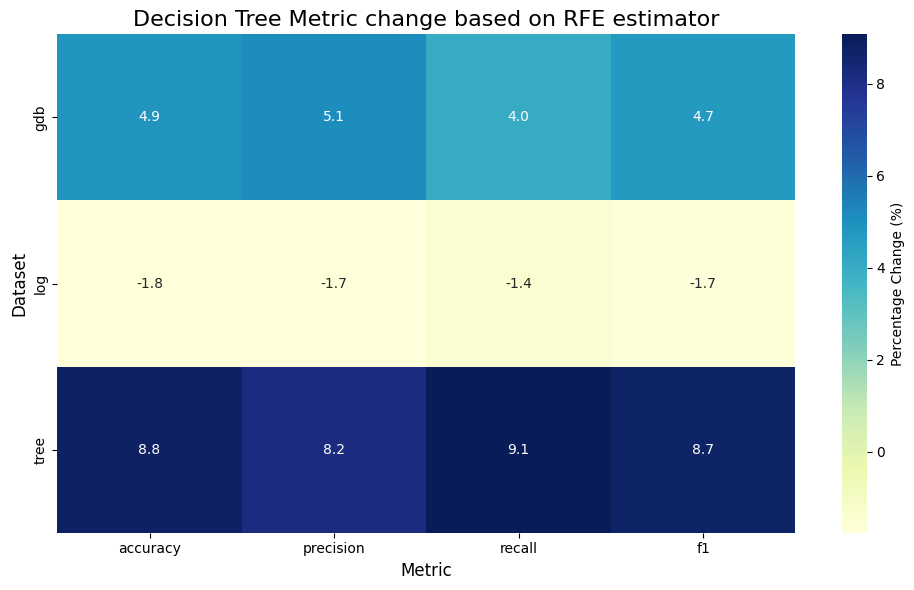

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_percentage_change_heatmap(scores, baseline_dataset="RAW"):
    """
    Plots a heatmap of the percentage change in metrics for datasets compared to a baseline dataset.

    Parameters:
        scores (pd.DataFrame): A DataFrame containing metrics for different datasets.
        baseline_dataset (str): The name of the baseline dataset (default is "RAW").
    """
    # Extract the baseline metrics
    baseline = scores[scores['dataset'] == baseline_dataset].iloc[0, 1:]  # Exclude the 'dataset' column

    # Calculate the percentage change relative to the baseline
    percentage_change = scores.copy()
    for col in baseline.index:
        percentage_change[col] = ((scores[col] - baseline[col]) / baseline[col]) * 100

    # Drop the baseline dataset from the comparison
    percentage_change = percentage_change[percentage_change['dataset'] != baseline_dataset]

    # Set the 'dataset' column as the index for the heatmap
    percentage_change.set_index("dataset", inplace=True)

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        percentage_change,
        annot=True,  # Show the percentage values in the heatmap
        fmt=".1f",   # Format the values to one decimal place
        cmap="YlGnBu",  # Use a diverging color palette
        cbar_kws={'label': 'Percentage Change (%)'}  # Add a color bar label
    )

    # Customize the plot
    plt.title(f"Decision Tree Metric change based on RFE estimator", fontsize=16)
    plt.xlabel("Metric", fontsize=12)
    plt.ylabel("Dataset", fontsize=12)
    plt.tight_layout()

    plt.show()

# Example usage
plot_percentage_change_heatmap(scores, baseline_dataset="RAW")

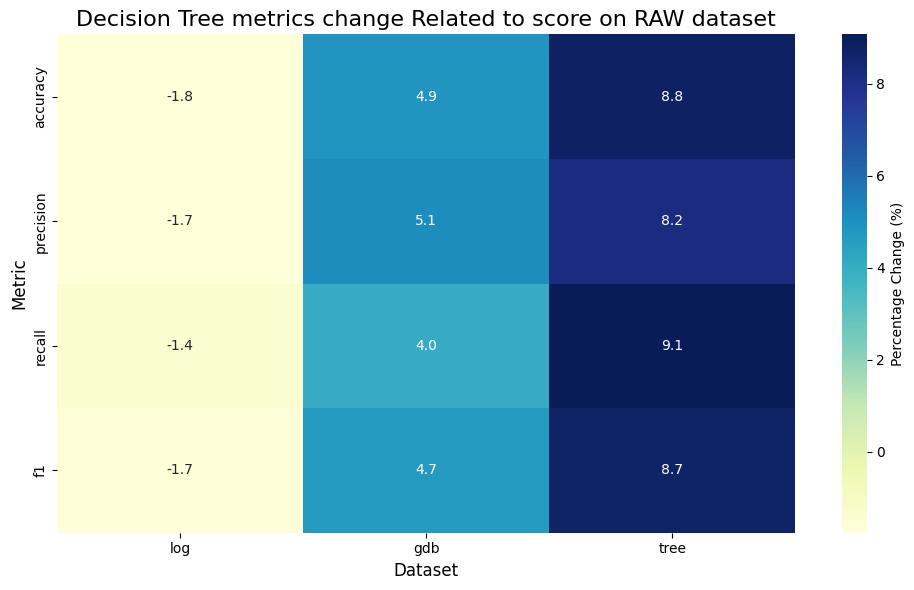

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_percentage_change_heatmap(scores, baseline_dataset="RAW"):
    """
    Plots a heatmap of the percentage change in metrics for datasets compared to a baseline dataset.

    Parameters:
        scores (pd.DataFrame): A DataFrame containing metrics for different datasets.
        baseline_dataset (str): The name of the baseline dataset (default is "RAW").
    """
    # Extract the baseline metrics
    baseline = scores[scores['dataset'] == baseline_dataset].iloc[0, 1:]  # Exclude the 'dataset' column

    # Calculate the percentage change relative to the baseline
    percentage_change = scores.copy()
    for col in baseline.index:
        percentage_change[col] = ((scores[col] - baseline[col]) / baseline[col]) * 100

    # Drop the baseline dataset from the comparison
    percentage_change = percentage_change[percentage_change['dataset'] != baseline_dataset]

    # Reorder the datasets to make "log" the first column
    dataset_order = ["log"] + [d for d in percentage_change["dataset"] if d != "log"]
    percentage_change["dataset"] = pd.Categorical(percentage_change["dataset"], categories=dataset_order, ordered=True)
    percentage_change = percentage_change.sort_values("dataset")

    # Set the 'dataset' column as the index and transpose the DataFrame
    percentage_change.set_index("dataset", inplace=True)
    percentage_change = percentage_change.T  # Transpose to swap X and Y axes

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        percentage_change,
        annot=True,  # Show the percentage values in the heatmap
        fmt=".1f",   # Format the values to one decimal place
        cmap="YlGnBu",  # Use a diverging color palette
        cbar_kws={'label': 'Percentage Change (%)'}  # Add a color bar label
    )

    # Customize the plot
    plt.title(f"Decision Tree metrics change Related to score on RAW dataset", fontsize=16)
    plt.xlabel("Dataset", fontsize=12)
    plt.ylabel("Metric", fontsize=12)
    plt.tight_layout()

    plt.show()

# Example usage
plot_percentage_change_heatmap(scores, baseline_dataset="RAW")

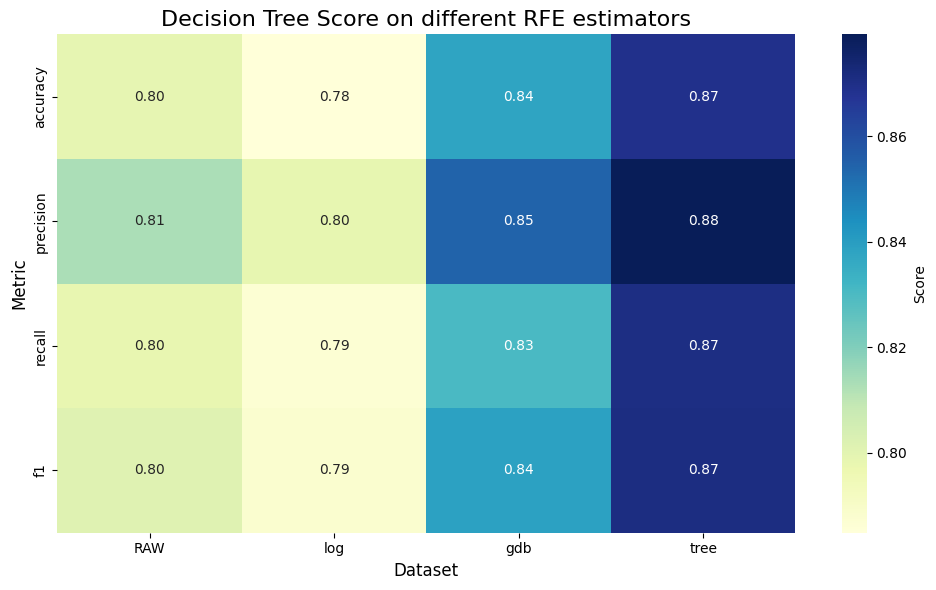

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metrics_scores(scores):
    """
    Plots a heatmap of the scores of the metrics for all datasets with a custom x-axis order.

    Parameters:
        scores (pd.DataFrame): A DataFrame containing metrics for different datasets.
    """
    # Set the custom order for the datasets
    custom_order = ["RAW", "log", "gdb", "tree"]
    scores = scores.set_index("dataset").reindex(custom_order).T  # Reorder and transpose

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        scores,
        annot=True,  # Show the metric values in the heatmap
        fmt=".2f",   # Format the values to two decimal places
        cmap="YlGnBu",  # Use a sequential color palette
        cbar_kws={'label': 'Score'}  # Add a color bar label
    )

    # Customize the plot
    plt.title("Decision Tree Score on different RFE estimators", fontsize=16)
    plt.xlabel("Dataset", fontsize=12)
    plt.ylabel("Metric", fontsize=12)
    plt.tight_layout()

    plt.show()

# Example usage
plot_metrics_scores(scores)

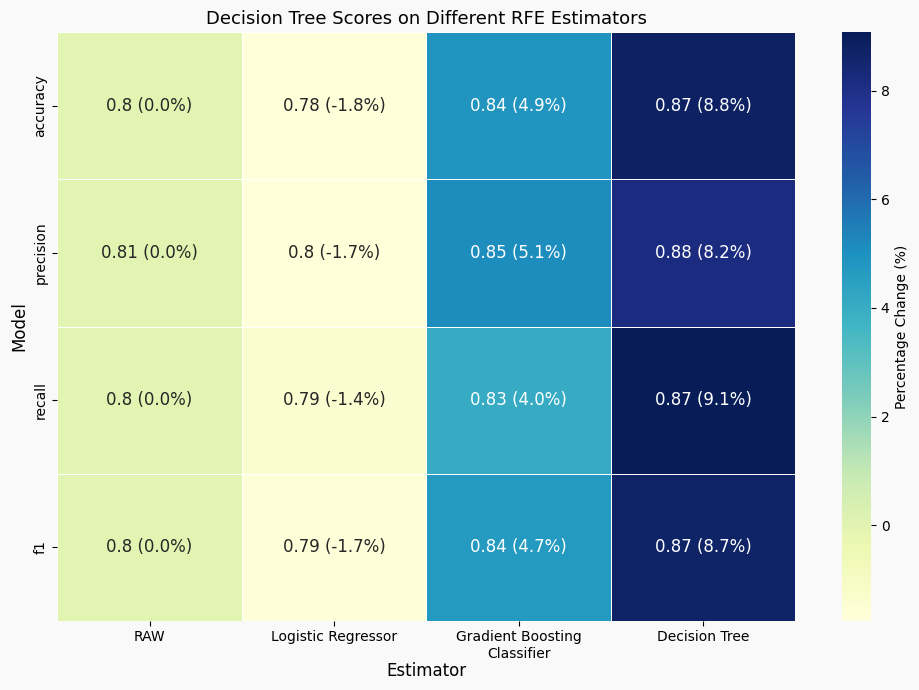

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metrics_scores_with_change(scores):
    """
    Plots a heatmap of the scores of the metrics for all datasets with a custom x-axis order.
    The heatmap shows the score and relative percentage change to the RAW dataset.
    The colors of the heatmap are based on the percentage change.

    Parameters:
        scores (pd.DataFrame): A DataFrame containing metrics for different datasets.
    """
    # Set the custom order for the datasets
    custom_order = ["RAW", "log", "gdb", "tree"]
    labels = ["RAW", "Logistic Regressor", "Gradient Boosting\nClassifier", "Decision Tree"]
    scores = scores.set_index("dataset").reindex(custom_order).T  # Reorder and transpose

    # Rename the columns using the labels list
    scores.rename(columns=dict(zip(custom_order, labels)), inplace=True)

    # Calculate percentage change relative to the RAW dataset
    raw_values = scores["RAW"]
    percentage_change = scores.subtract(raw_values, axis=0).divide(raw_values, axis=0) * 100

    # Combine scores with percentage change for annotations
    combined_data = scores.copy()
    for col in scores.columns:
        combined_data[col] = scores[col].round(2).astype(str) + " (" + percentage_change[col].round(1).astype(str) + "%)"

    # Plot the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(
        percentage_change,  # Use percentage_change for coloring
        annot=combined_data.values,  # Display combined accuracy and percentage change
        fmt="",  # No formatting needed since values are strings
        cmap="YlGnBu",  # Diverging color palette for percentage changes
        cbar_kws={'label': 'Percentage Change (%)'},
        linewidths=0.5,  # Add spacing between the squares
        linecolor="white",
        annot_kws={"size": 12}
    )


    # Set the background color
    plt.gca().set_facecolor("#f9f9f9")  # Set the axes background color
    plt.gcf().set_facecolor("#f9f9f9")  # Set the figure background color

    # Customize the plot
    plt.title(f"Decision Tree Scores on Different RFE Estimators", fontsize=13)
    plt.xlabel("Estimator", fontsize=12, labelpad=1)
    plt.ylabel("Model", fontsize=12)
    plt.xticks(rotation=0, ha='center')  # Ensure x-axis labels are centered
    plt.tight_layout()

    plt.show()

# Example usage
plot_metrics_scores_with_change(scores)

# Best MLP model: MLP + RFE with logistic regressor estimator

In [ ]:
# Filter the DataFrame for the 'mlp' model and 'RFE' dataset
mlp_rfe_scores = all_scores[(all_scores['model'] == 'mlp') & (all_scores['dataset'] == 'RFE')].drop(columns=['dataset', 'model']).mean()
# tree_rfe_scores = all_scores[(all_scores['model'] == 'tree') & (all_scores['dataset'] == 'RFE')].drop(columns=['dataset', 'model']).mean()

# Display the filtered DataFrame
print(mlp_rfe_scores)

accuracy     0.955790
precision    0.974169
recall       0.939967
f1           0.955600
dtype: float64


# Best tree model: TREE + RFE with tree as estimator

In [ ]:
tree_imp_scores = all_rfe_scores[(all_rfe_scores['model'] == 'tree') & (all_rfe_scores['dataset'] == 'tree')].drop(columns=['dataset', 'model']).mean()
tree_imp_scores

accuracy     0.869294
precision    0.879345
recall       0.870588
f1           0.871218
dtype: float64

In [172]:
scores

,dataset,accuracy,precision,recall,f1
0,RAW,0.798866,0.813034,0.798170,0.801340
1,gdb,0.837714,0.854570,0.830490,0.839047
2,log,0.784824,0.798842,0.786863,0.787913
3,tree,0.869294,0.879345,0.870588,0.871218


In [ ]:
mlp_rfe_scores = all_scores[(all_scores['model'] == 'knn') & (all_scores['dataset'] == 'RFE')].drop(columns=['dataset', 'model']).mean()
mlp_rfe_scores

accuracy     0.863529
precision    0.954926
recall       0.771895
f1           0.848997
dtype: float64

In [ ]:
voting_score = pd.read_csv(f"{SCORES_DIR}/voting_final_score.csv")

voting_score.T.reset_index().drop(columns=["index"]).rename(columns={0: "accuracy", 1: "precision", 2: "recall", 3: "f1"}).drop(0, axis=0).mean()

accuracy     0.924529
precision    0.967724
recall       0.884052
f1             0.9217
dtype: object